<a href="https://colab.research.google.com/github/anmolkumar0717/pyTorch/blob/main/temp_03_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Computer Vision


## Computer Vision library for pytorch is TORCHVISION

In [1]:
# torchvision.datasets
# torchvision.models
# torchvision.transform
# torch.utils.data.Datasets
# torch.utils.data.DataLoader

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Getting a dataset

## The dataset we are using is FashsionMNIST from torchvision.datasets

In [3]:
# setup training data

train_data=datasets.FashionMNIST(
    root="data",  # where to download data to ?
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None           # To change the labels of the data
)

100%|██████████| 26421880/26421880 [00:06<00:00, 4079503.93it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209439.52it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3873993.78it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7673161.69it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
# for test dataset

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
image,label=train_data[0]

In [6]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
len(train_data) , len(test_data)

(60000, 10000)

In [8]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
print(f"Image shape: {image.shape} in the format of the [Color_channel,height,width] and label is {class_name[label]}" )

Image shape: torch.Size([1, 28, 28]) in the format of the [Color_channel,height,width] and label is Ankle boot


image shape:torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0

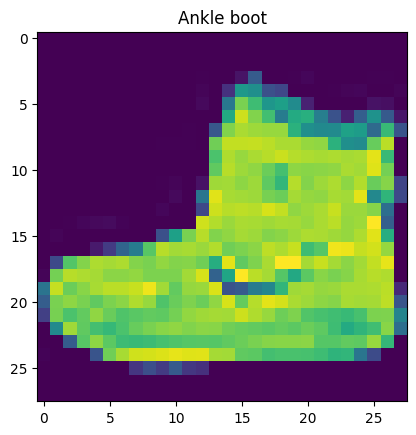

In [11]:
# VIsualization the data
import matplotlib.pyplot as plt

image,label=train_data[0]

print(f"image shape:{image.shape}")
print(image)
plt.title(class_name[label])
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

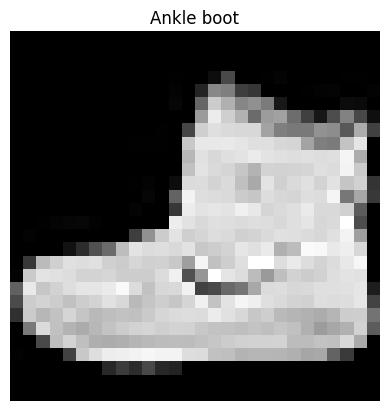

In [12]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)

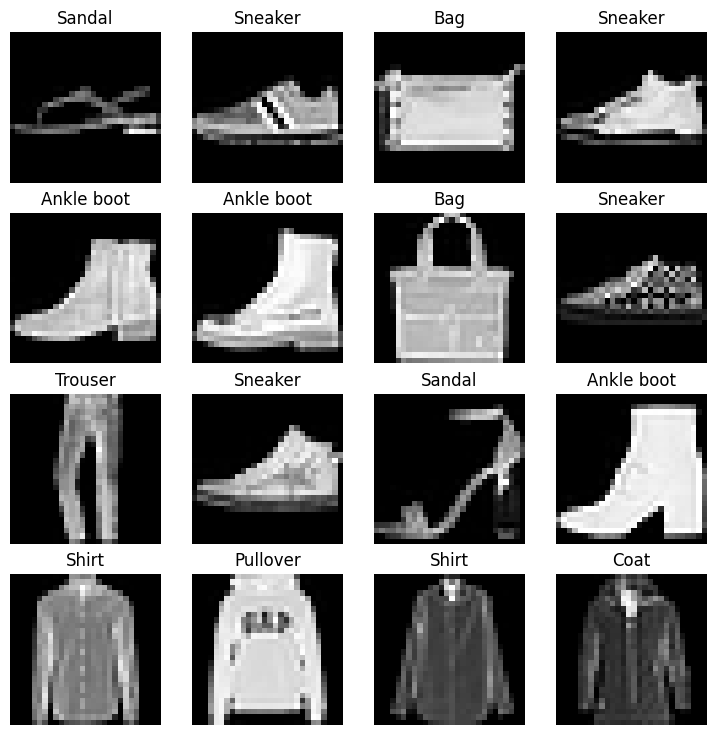

In [13]:
# plot more images usinf the torch.randn function

# torch.manual_seed(42)
plt.figure(figsize=(9,9))
rows,columns=4,4
for i in range(1,rows*columns+1):
  random_idx=torch.randint(1,len(train_data),size=[1]).item()
  random_image,random_label=train_data[random_idx]
  plt.subplot(rows,columns,i)
  plt.imshow(random_image.squeeze(),cmap="gray")
  plt.title(class_name[random_label])
  plt.axis(False)


# prepare DataLoader

DataLoader terns our dataset into python iterable.

More specifically, we want to tern them into batch size or the mini-batch size

In [14]:
from torch.utils.data import DataLoader

In [15]:
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True)
len(train_dataloader)

1875

In [16]:
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=32,
                           shuffle=False)

In [17]:
train_features_batch, train_label_batch=next(iter(train_dataloader))

# Model 0 :Building a base line model


a base model which you can improve the model

In [18]:
# flatten layer

flatten_model=nn.Flatten()

x=train_features_batch[0]

sample_output=flatten_model(x)

print(f"Flatten model output : {sample_output}, original output:{x} ,shape of flattenlayer:{sample_output.shape} shape of the original_output:{x.shape}")


Flatten model output : tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000,
         0.0784, 0.1765, 0.0431, 0.0000, 0.0000, 0.0000, 0.0000, 0.2784, 0.2745,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0196, 0.3255,
         0.5686, 0.6941, 0.7686, 0.9373, 0.9176, 0.8510, 0.8784, 0.9608, 0.9098,
         0.7176, 0.6667, 0.4353, 0.1373, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.2196, 0.7686,
         0.7176, 0.6235, 0.5686, 0.5020, 0.6118, 0.8118, 0.9216, 0.8902, 0.7255,
         0.4784, 0.5333, 0.5882, 0.6863, 0.8000, 0.4235, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.7216,
         0.6549, 0.5529, 0.5255, 0.5451, 0.5333, 0.5059, 0.4784, 0.4784, 0.4667,
         0.4784, 0.5333, 0.5529, 0.5255, 0.5412, 0.5765, 0.7020, 0.3059, 0.0000,
     

In [19]:
from torch import nn
torch.manual_seed(42)

class FashionMNISTModel(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)

    )

  def forward(self,x):
    return self.layer_stack(x)



In [20]:
torch.manual_seed(42)
model_0=FashionMNISTModel(input_shape=784,
                          hidden_units=10,
                          output_shape=len(class_name))

model_0.to("cpu")

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss function : since we are dealing with multiclass classification model so we have to use the `CrossEntropyLoss()`

### Optimizer : we have to the SGD which is `schocastic gradient descent` (torch.optim.SGD)

###For evaluation we use the `Accuracy` function from matric module



In [22]:
from pathlib import Path
import requests

if Path("helper_function.py").is_file():
  print("Already downloaded")

else:
  respo=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(respo.content)



In [23]:
from helper_function import accuracy_fn

#setup our loss function

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [24]:
### 3. Creating a funcnction to time our experiments

In [25]:
from timeit import default_timer as timmer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time=end-start
  print(f"Total time on {device} :{total_time:.3f} seconds")
  return total_time





In [26]:
start_time=timmer()
#eee
####
end_time=timmer()
print_train_time(start=start_time,end=end_time,device="cpu")

Total time on cpu :0.000 seconds


4.457400001456335e-05

# creating a training loop and training a model on batches of data


In [27]:
#importing the tqdm   --> for progess bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_cpu=timmer()

#keep small epochs for speed progress

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n -----")
  #traing our data
  train_loss=0

  # add a loop to loop through the training batches.
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1.forward pass

    Y_preds=model_0(X)

    # 2.Calculate the loss
    loss=loss_fn(Y_preds,y)
    train_loss+=loss

    #3.optimizer zero_grad
    optimizer.zero_grad()

    #4.loss backwards
    loss.backward()

    #5 optimizer step
    optimizer.step()


    if (batch%400)==0:
      print(f"Looked at{batch*len(X)} / {len(train_dataloader.dataset)} sample ")

  train_loss/=len(train_dataloader)

  #testing our model
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,Y_test in test_dataloader:
      # Forword pss
      test_preds=model_0(X_test)

      # test loss
      test_loss+=loss_fn(test_preds,Y_test)

      # calculate the accuracy
      test_acc+=accuracy_fn(y_true=Y_test,y_pred=test_preds.argmax(dim=1))

    # calculate the loss avg per batch
    test_loss/=len(test_dataloader)

    # Calculate the accuracy per bactch
    test_acc/=len(test_dataloader)

  print(f"Train loss:{loss:.4f} | Test Loss : {test_loss:.4f} | Test Accuracy : {test_acc:.4f}")

# calculate the train time ends
train_time_end_cpu=timmer()
total_train_time0=print_train_time(start=train_time_start_cpu,
                                   end=train_time_end_cpu,
                                   device=str(next(model_0.parameters()).device)
                                  )




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 -----
Looked at0 / 60000 sample 
Looked at12800 / 60000 sample 
Looked at25600 / 60000 sample 
Looked at38400 / 60000 sample 
Looked at51200 / 60000 sample 
Train loss:0.4652 | Test Loss : 0.5095 | Test Accuracy : 82.0387
Epoch : 1 
 -----
Looked at0 / 60000 sample 
Looked at12800 / 60000 sample 
Looked at25600 / 60000 sample 
Looked at38400 / 60000 sample 
Looked at51200 / 60000 sample 
Train loss:0.6015 | Test Loss : 0.4799 | Test Accuracy : 83.1969
Epoch : 2 
 -----
Looked at0 / 60000 sample 
Looked at12800 / 60000 sample 
Looked at25600 / 60000 sample 
Looked at38400 / 60000 sample 
Looked at51200 / 60000 sample 
Train loss:0.3182 | Test Loss : 0.4766 | Test Accuracy : 83.4265
Total time on cpu :31.831 seconds


In [28]:
str(next(model_0.parameters()).device)
device="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [29]:
# creating a function for evaluating our model

torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device
               ):
  """ Return a dictionary containg the model predictions on data_loader """
  loss, acc=0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():

    for X,Y in tqdm(dataloader):
      X,Y=X.to(device),Y.to(device)

      Y_pred=model(X)

      loss+=loss_fn(Y_pred,Y)

      acc+=accuracy_fn(y_true=Y,y_pred=Y_pred.argmax(dim=1))


    # find the avg of loss/batch
    loss/=len(dataloader)
    acc/=len(dataloader)

  return {"model_name:":model.__class__.__name__,
          "model loss": loss.item(),
          "model accuracy":acc}


model_0_result=eval_model(model=model_0,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)


model_0_result




  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name:': 'FashionMNISTModel',
 'model loss': 0.47663894295692444,
 'model accuracy': 83.42651757188499}

# setup device agnostic code for our new model

In [30]:
!nvidia-smi


Tue Jun 25 10:34:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0              28W /  70W |    151MiB / 15360MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
device="cuda" if torch.cuda.is_available else "cpu"
device


'cuda'

In [32]:
model_0.to(device)

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [33]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
                      [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
                      [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
                      ...,
                      [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
                      [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
                      [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0347,  0.2171,  1.2718, -0.6801,  0.5913,  0.5407, -0.3141,  0.1579,
                      -0.1607,  1.0250], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.3778, -0.4992, -0.1694,  0.4066,  0.4166,  0.7116, -0.1699, -0.2955,
                       -0.2232,  0.3107],
                      [-0

In [34]:
# Creating a new model for FashionMNISt using the nn.ReLU non linear function

import torch
from torch import nn
class FashionMNISTv1(nn.Module):
  def __init__(self,
               input_layer:int,
               hidden_layer:int,
               output_layer:int):
    super().__init__()

    self.stack_layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_layer,
                  out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer,
                  out_features=output_layer),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.stack_layer(x)



In [35]:
torch.manual_seed(42)
model_1=FashionMNISTv1(input_layer=784,
                       hidden_layer=10,
                       output_layer=10)


In [36]:
next(model_1.parameters()).device

device(type='cpu')

In [37]:
from helper_function import accuracy_fn
oss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)


In [38]:
# Creating a Training Function For Reuseibility
def train_step(model:torch.nn.Module,
                  train_dataloader:torch.utils.data.DataLoader,
                  loss_fn:torch.nn.Module,
                  optimizer:torch.optim.Optimizer,
                  accuracy_fn,
                  device:torch.device=device
                  ):

  model.to(device)

  train_loss=0
  train_acc=0
  for batch,(X,y) in enumerate(train_dataloader):
    X,y=X.to(device),y.to(device)
    model.train()
    # Forward Pass
    Y_pred=model(X)

    # calculating the accuracy
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=Y_pred.argmax(dim=1))

    # Calculate the loss
    loss=loss_fn(Y_pred,y)
    train_loss+=loss
    # optimize the zero grad
    optimizer.zero_grad()
    # loss backwards
    loss.backward()
    # Optimizer Step
    optimizer.step()
  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)

  print(f"Traing loss is {train_loss:.5f} | Training Accuracy is {train_acc:.2f}%")





In [39]:
# Creating a Function for testing loop

def test_step(model:torch.nn.Module,
              test_dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device=device
              ):
  test_loss, test_acc=0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test,y_test=X_test.to(device),y_test.to(device)
      test_preds=model(X_test)
      test_acc+=accuracy_fn(y_true=y_test,
                           y_pred=test_preds.argmax(dim=1))
      test_loss+=loss_fn(test_preds,y_test)

    test_acc/=len(test_dataloader)
    test_loss/=len(test_dataloader)

    print(f"Test Loss : {test_loss} | Test Accuracy : {test_acc}")


In [40]:
# creating a train and test loop for the model_1
from timeit import default_timer as timer
from tqdm.auto import tqdm

epochs=3
start_time_on_gpu=timer()
for epoch in tqdm(range(epochs)):
  print(f"epoch {epoch} ----")
  train_step(model=model_1,
             train_dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

end_time_on_gpu=timer()
total_train_time1=print_train_time(start =start_time_on_gpu,
                 end = end_time_on_gpu,
                 device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch 0 ----
Traing loss is 1.05878 | Training Accuracy is 62.19%
Test Loss : 0.9950557351112366 | Test Accuracy : 64.12739616613419
epoch 1 ----
Traing loss is 0.91331 | Training Accuracy is 66.40%
Test Loss : 0.905079185962677 | Test Accuracy : 66.86301916932908
epoch 2 ----
Traing loss is 0.87982 | Training Accuracy is 67.24%
Test Loss : 0.8947636485099792 | Test Accuracy : 66.46365814696486
Total time on cuda :31.511 seconds


In [41]:
# get the model 1 result
model_1_result=eval_model(model=model_1,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device)
print(model_1_result)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name:': 'FashionMNISTv1', 'model loss': 0.8947636485099792, 'model accuracy': 66.46365814696486}


# Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also called ConvNet .


CNN's are also knows for thier capability of finding patern in visual data

In [42]:
# creating a new model which can use convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()

    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=output_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    # print(x.shape)
    x=self.conv_block_2(x)
    # print(x.shape)
    x=self.classifier(x)

    return x


In [43]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_name))

In [44]:
model_2(image.unsqueeze(dim=0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

In [45]:
image.shape

torch.Size([1, 28, 28])

In [46]:
image=torch.randn(size=(32,3,64,64))
test_image=image[0]

In [47]:
# creating one comv2d
torch.manual_seed(42)
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)

test_res=conv_layer(test_image.unsqueeze(0))
test_res.shape


torch.Size([1, 10, 62, 62])

In [48]:
# Steping Through Maxpool

torch.manual_seed(42)
maxpool=nn.MaxPool2d(kernel_size=2)

print(maxpool(test_res).shape)

torch.Size([1, 10, 31, 31])


In [49]:
torch.manual_seed(42)
#setting up the loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [50]:
# Traing and Testing Loop for the Model_2
from tqdm.auto import tqdm
from timeit import default_timer as timer
epochs=3
model_2_start_time=timer()
for epoch in tqdm(range(epochs)):
  print(f"epoch {epoch} ----")
  train_step(model=model_2,
             train_dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )
  test_step(model=model_2,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device
            )
end_time_model_2=timer()
total_train_time2=print_train_time(start=model_2_start_time,
                 end=end_time_model_2,
                 device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch 0 ----
Traing loss is 0.59386 | Training Accuracy is 78.41%
Test Loss : 0.40488460659980774 | Test Accuracy : 85.60303514376997
epoch 1 ----
Traing loss is 0.35963 | Training Accuracy is 86.96%
Test Loss : 0.36716046929359436 | Test Accuracy : 86.50159744408946
epoch 2 ----
Traing loss is 0.32216 | Training Accuracy is 88.29%
Test Loss : 0.3189564645290375 | Test Accuracy : 88.47843450479233
Total time on cuda :37.233 seconds


In [51]:
#model 2 result
model_2_result=eval_model(model=model_2,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device
                          )
model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name:': 'FashionMNISTModelV2',
 'model loss': 0.3189564645290375,
 'model accuracy': 88.47843450479233}

In [52]:
model_0_result

{'model_name:': 'FashionMNISTModel',
 'model loss': 0.47663894295692444,
 'model accuracy': 83.42651757188499}

# comparining the result and training result


In [53]:
import pandas as pd
compare_result=pd.DataFrame([model_0_result,
                             model_1_result,
                             model_2_result])
compare_result

,model_name:,model loss,model accuracy
0,FashionMNISTModel,0.476639,83.426518
1,FashionMNISTv1,0.894764,66.463658
2,FashionMNISTModelV2,0.318956,88.478435


In [54]:
# Add Traing time to result comparision
compare_result["Training_time"]=[total_train_time0,total_train_time1,total_train_time2]
compare_result

,model_name:,model loss,model accuracy,Training_time
0,FashionMNISTModel,0.476639,83.426518,31.831092
1,FashionMNISTv1,0.894764,66.463658,31.511318
2,FashionMNISTModelV2,0.318956,88.478435,37.232584


Text(0, 0.5, 'Model')

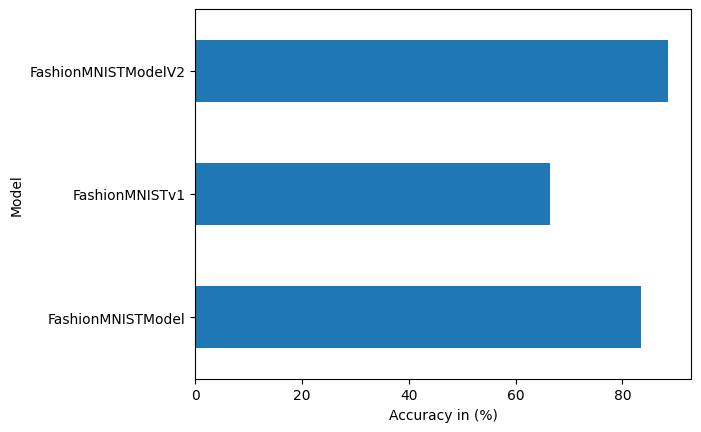

In [55]:
# Visualize our model result
compare_result.set_index("model_name:")["model accuracy"].plot(kind="barh")
plt.xlabel("Accuracy in (%)")
plt.ylabel("Model")

In [56]:
# make and evaluate the best model
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device,
                     ):
  pred_probs= []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample(add a batch dimension and send it to the target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)
      # forwad pass
      pred_logits=model(sample)

      #get the pred_probs
      pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)

      #pred_probs
      pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)



In [63]:
import random
test_sample=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_sample.append(sample)
  test_labels.append(label)


In [64]:
pred_prob=make_predictions(model=model_2,
                           data=test_sample,
                           device=device)

pred_class=pred_prob.argmax(dim=1)
pred_class

tensor([4, 6, 4, 2, 8, 3, 0, 9, 6])

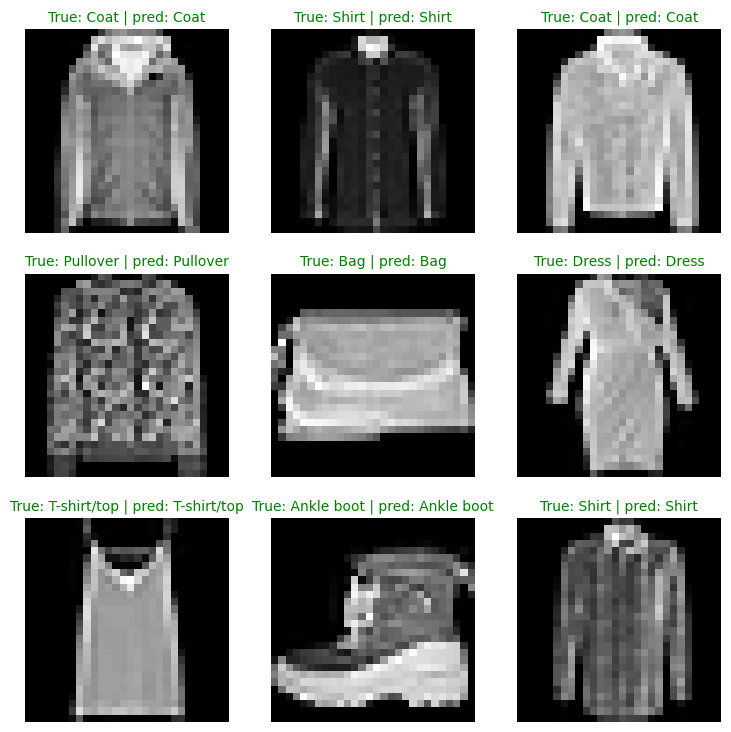

In [65]:
row=3
column=3
plt.figure(figsize=(9,9))
for i,sample in enumerate(test_sample):
  plt.subplot(row,column,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')
  true_value=class_name[test_labels[i]]
  pred_label=class_name[pred_class[i]]
  statement=f"True: {true_value} | pred: {pred_label}"
  if(true_value==pred_label):
    plt.title(statement,fontsize=10,c="g")
  else:
    plt.title(statement,fontsize=10,c="r")
  plt.axis(False)




In [68]:
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc="Making prediction ...."):
    x,y=x.to(device),y.to(device)
    Y_logit=model_2(x)
    y_pred=torch.softmax(Y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
# print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor


Making prediction ....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [70]:
pip install torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [75]:
from re import U
try:
  import torchmetrics,mlxtend
  assert int(mlxtend.__version__.split(".")[1]) >=19, "Require not Satisfy"

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version :{mlxtend.__version__}")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.1 MB/s eta 0:00:00
mlxtend version :0.22.0


In [85]:
import mlxtend,torchmetrics
test_data.targets
len(class_name)

10

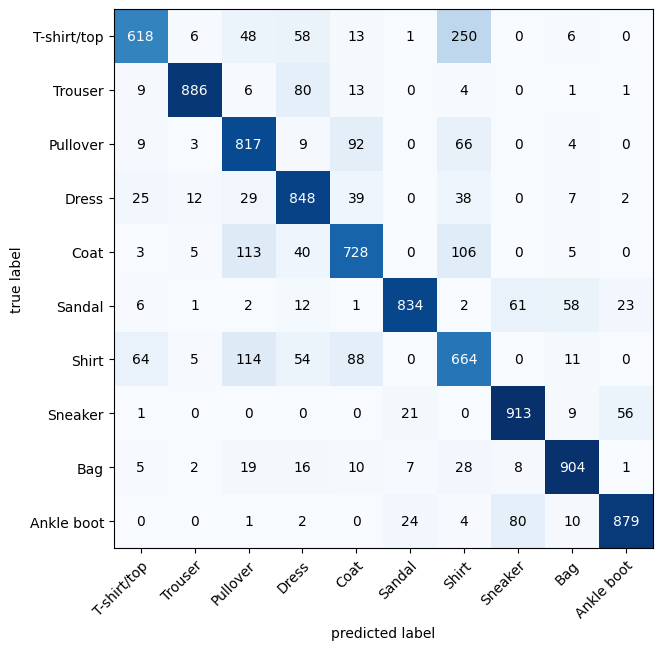

In [94]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#setup the confusion matric
conf_mat=ConfusionMatrix(task='multiclass',num_classes=len(class_name))
conf_tensor=conf_mat(preds=y_pred_tensor,
                     target=test_data.targets)
# Plot our metrics
fig,ax=plot_confusion_matrix(
    conf_mat=conf_tensor.numpy(),
    class_names=class_name,
    figsize=(10,7)
)

In [91]:
conf_tensor

tensor([[618,   6,  48,  58,  13,   1, 250,   0,   6,   0],
        [  9, 886,   6,  80,  13,   0,   4,   0,   1,   1],
        [  9,   3, 817,   9,  92,   0,  66,   0,   4,   0],
        [ 25,  12,  29, 848,  39,   0,  38,   0,   7,   2],
        [  3,   5, 113,  40, 728,   0, 106,   0,   5,   0],
        [  6,   1,   2,  12,   1, 834,   2,  61,  58,  23],
        [ 64,   5, 114,  54,  88,   0, 664,   0,  11,   0],
        [  1,   0,   0,   0,   0,  21,   0, 913,   9,  56],
        [  5,   2,  19,  16,  10,   7,  28,   8, 904,   1],
        [  0,   0,   1,   2,   0,  24,   4,  80,  10, 879]])

In [ ]:
# Save and Load the